In [1]:
from collections import defaultdict
from csv import DictReader

import networkx as nx
from iouopt import Journal
from IPython.display import SVG, display

def draw(g):
    display(SVG(nx.nx_agraph.to_agraph(g).draw(prog="dot", format="svg")))

## Read IOUs from CSV

In [2]:
ious = []
with open("vacation.csv") as f:
    for row in DictReader(f):
        expense = row["Expense"]
        lender = row["Paid by"]
        amount = int(100 * float(row["Amount per Person ($)"]))
        for borrower in row["Split Among"].split(","):
            ious.append((expense, borrower, lender, amount))

## Visualize IOU graph

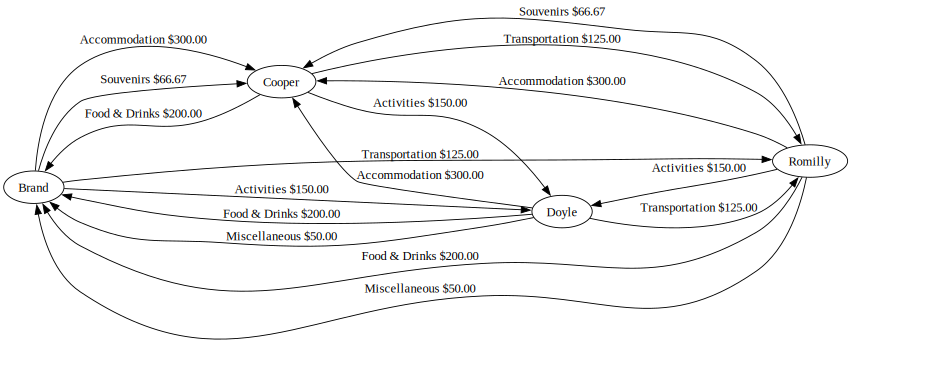

In [3]:
I = nx.MultiDiGraph(rankdir="LR", dpi="65")
for expense, borrower, lender, amount in ious:
    if borrower != lender:
        I.add_edge(borrower, lender, label=f"{expense} ${amount/100.0:.2f}")

draw(I)

## Visualize Net IOU graph

Calculate the net amounts owed between everyone in the group. This would be a reasonable solution to achieve using a spreadsheet.

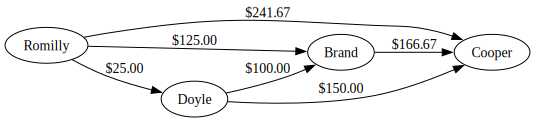

In [4]:
payables = defaultdict(int)
for _, borrower, lender, amount in ious:
    payables[borrower, lender] += amount

N = nx.DiGraph(rankdir="LR")
for borrower, lender in payables.keys():
    net_amount = payables[borrower, lender] - payables[lender, borrower]
    if net_amount > 0:
        N.add_edge(borrower, lender, label=f"${net_amount/100.0:.2f}")

draw(N)

## Simplify IOUs with `iouopt`

In [5]:
j = Journal[str]()
for _, borrower, lender, amount in ious:
    j.append(borrower, lender, amount)

solution = []
for borrower, lender, amount in j.simplify():
    solution.append((borrower, lender, amount))

## Visualize Solution

The group's IOUs can be settled in just 3 transactions.

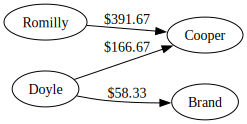

In [6]:
S = nx.DiGraph(rankdir="LR")
for borrower, lender, amount in solution:
    S.add_edge(borrower, lender, label=f"${amount/100.0:.2f}")

draw(S)